Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Step 2: Load Data

In [ ]:
from google.colab import drive

#mount to google drive
drive.mount("/content/drive")

#define file path
file_path = "/content/drive/MyDrive/Applied ML for PH Data/Week 3/Datathon #2 - Cardiovascular Health.csv" ##replace with your file path

#load csv data in pandas frame
df = pd.read_csv(file_path)

#display first few heads to see if data loaded correctly
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private Sector,Urban,228.69,36.6,Former Smoker,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
2,31112,Male,80,0,1,Yes,Private Sector,Rural,105.92,32.5,Never Smoker,1
3,60182,Female,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,Never Smoker,1


Step 3: Data Exploration

In [ ]:
description = df.describe()
description

#mean age for the dataset is around 50 years old
#youngest person is 18 and oldest is 82 so no crazy outliers to remove but maybe we could think about excluding those of retirement age (65 and over)?

,id,age,hypertension,heart_disease,random_glucose,bmi,stroke
count,4254.000000,4254.000000,4254.000000,4254.000000,4254.000000,4073.000000,4254.000000
mean,36596.556653,50.202163,0.116831,0.064645,108.514394,30.432752,0.058063
std,21177.398549,17.829035,0.321257,0.245927,47.769400,7.235143,0.233890
min,84.000000,18.000000,0.000000,0.000000,55.120000,11.300000,0.000000
25%,17887.000000,36.000000,0.000000,0.000000,77.482500,25.400000,0.000000
50%,37089.500000,50.500000,0.000000,0.000000,92.465000,29.200000,0.000000
75%,54771.000000,64.000000,0.000000,0.000000,116.135000,34.200000,0.000000
max,72918.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


Step 4: Check for missing values

In [ ]:
# Checking for missing values, in case there are any NA values, in this case there are none
print(df.isnull().sum())

#no missing values to deal with in variables of interest (gender, age, and employment)

id                  0
gender              0
age                 0
hypertension        0
heart_disease       0
ever_married        0
employment          0
residence_type      0
random_glucose      0
bmi               181
smoking_status      0
stroke              0
dtype: int64


Step 5: Clean data (rows):
- exclude everyone over 65 (age of retirement)
- exclude "Other" gender (n=1)

In [ ]:
df = df[df['age'] <= 65] #exclude everyone over 65
df = df[df['gender'] != 'Other'] #exclude "other" in gender column

df

,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,Never Smoker,1
3,60182,Female,49,0,0,Yes,Private Sector,Urban,171.23,34.4,Active Smoker,1
8,27419,Female,59,0,0,Yes,Private Sector,Rural,76.15,NaN,Unknown,1
11,12095,Female,61,0,1,Yes,Public Sector,Rural,120.46,36.8,Active Smoker,1
12,12175,Female,54,0,0,Yes,Private Sector,Urban,104.51,27.3,Active Smoker,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4247,45010,Female,57,0,0,Yes,Private Sector,Rural,77.93,21.7,Never Smoker,0
4248,22127,Female,18,0,0,No,Private Sector,Urban,82.85,46.9,Unknown,0
4251,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,Never Smoker,0
4252,37544,Male,51,0,0,Yes,Private Sector,Rural,166.29,25.6,Former Smoker,0


Step 6: Transform gender, ever_married, and residence_type column from categorical to binary

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender']) #female = 0

df['ever_married'] = le.fit_transform(df['ever_married']) #No = 0

df['residence_type'] = le.fit_transform(df['residence_type']) #rural = 0

df.head()

df

,id,gender,age,hypertension,heart_disease,ever_married,employment,residence_type,random_glucose,bmi,smoking_status,stroke
1,51676,0,61,0,0,1,Self-employed,0,202.21,NaN,Never Smoker,1
3,60182,0,49,0,0,1,Private Sector,1,171.23,34.4,Active Smoker,1
8,27419,0,59,0,0,1,Private Sector,0,76.15,NaN,Unknown,1
11,12095,0,61,0,1,1,Public Sector,0,120.46,36.8,Active Smoker,1
12,12175,0,54,0,0,1,Private Sector,1,104.51,27.3,Active Smoker,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4247,45010,0,57,0,0,1,Private Sector,0,77.93,21.7,Never Smoker,0
4248,22127,0,18,0,0,0,Private Sector,1,82.85,46.9,Unknown,0
4251,19723,0,35,0,0,1,Self-employed,0,82.99,30.6,Never Smoker,0
4252,37544,1,51,0,0,1,Private Sector,0,166.29,25.6,Former Smoker,0


Step 7: One-hot encode employment and smoking status

In [ ]:
#one hot encoding
df_encoded = pd.get_dummies(df, columns= ['employment', "smoking_status"])
df_encoded.head()

,id,gender,age,hypertension,heart_disease,ever_married,residence_type,random_glucose,bmi,stroke,employment_Private Sector,employment_Public Sector,employment_Self-employed,employment_Unemployed,smoking_status_Active Smoker,smoking_status_Former Smoker,smoking_status_Never Smoker,smoking_status_Unknown
1,51676,0,61,0,0,1,0,202.21,NaN,1,False,False,True,False,False,False,True,False
3,60182,0,49,0,0,1,1,171.23,34.4,1,True,False,False,False,True,False,False,False
8,27419,0,59,0,0,1,0,76.15,NaN,1,True,False,False,False,False,False,False,True
11,12095,0,61,0,1,1,0,120.46,36.8,1,False,True,False,False,True,False,False,False
12,12175,0,54,0,0,1,1,104.51,27.3,1,True,False,False,False,True,False,False,False


Step 8: Clean data (columns) for Model 1
- Remove clinical factors (hypertension, heart disease, random glucose and bmi) to only focus on all lifestyle factors in the dataset that affect stroke (age, gender, employment, smoking status, residence type, and marriage status). Also removed ID as it does not provide any meaningful contribution to the model.

In [ ]:
df_clean1 = df_encoded.loc[:, ['age', 'gender', 'employment_Private Sector', "employment_Public Sector", "employment_Self-employed", "employment_Unemployed", 'stroke', "smoking_status_Active Smoker", "smoking_status_Former Smoker", "smoking_status_Never Smoker", "smoking_status_Unknown", "residence_type", "ever_married"]]
df_clean1.head()

,age,gender,employment_Private Sector,employment_Public Sector,employment_Self-employed,employment_Unemployed,stroke,smoking_status_Active Smoker,smoking_status_Former Smoker,smoking_status_Never Smoker,smoking_status_Unknown,residence_type,ever_married
1,61,0,False,False,True,False,1,False,False,True,False,0,1
3,49,0,True,False,False,False,1,True,False,False,False,1,1
8,59,0,True,False,False,False,1,False,False,False,True,0,1
11,61,0,False,True,False,False,1,True,False,False,False,0,1
12,54,0,True,False,False,False,1,True,False,False,False,1,1


Step 9: Clean data (columns) for Model 2
- Remove clinical factors (hypertension, heart disease, random glucose and bmi) and select lifestyle factors (smoking status, residence type and marriage status) that may affect stroke to focus on the relationship between stroke and age, gender, and employment. Also removed ID as it does not provide any meaningful contribution to the model.

In [ ]:
df_clean2 = df_encoded.loc[:, ['age', 'gender', 'employment_Private Sector', "employment_Public Sector", "employment_Self-employed", "employment_Unemployed", 'stroke']]
df_clean2.head()

,age,gender,employment_Private Sector,employment_Public Sector,employment_Self-employed,employment_Unemployed,stroke
1,61,0,False,False,True,False,1
3,49,0,True,False,False,False,1
8,59,0,True,False,False,False,1
11,61,0,False,True,False,False,1
12,54,0,True,False,False,False,1


Step 10: Splitting Data into Training and Testing (Model 1)

In [ ]:

import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split

#Split data into features and target variable
X = df_clean1.drop('stroke', axis=1)
y = df_clean1['stroke']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42, stratify=y)

#Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #fit and transform on training set
X_test = scaler.transform(X_test) #transform test

Step 11: Build Logistic Regression Model
- using L2 (ridge) to prevent overfitting
- L2 handles multicollinearity among correlated categorical predictors

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Step 12: Evaluating performance of logistic regression Model 1

In [ ]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#640 true negatives, 0 false positives, 18 false negatives (missed strokes) and 0 true positives (correctly detected strokes)
#model accuracy for predicting no stroke is 97% BUT severe class imbalance because precision is 0.00 for stroke

Confusion Matrix:
[[640   0]
 [ 18   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       640
           1       0.00      0.00      0.00        18

    accuracy                           0.97       658
   macro avg       0.49      0.50      0.49       658
weighted avg       0.95      0.97      0.96       658



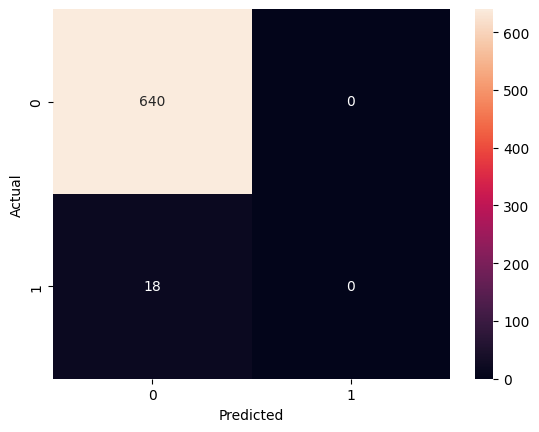

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Step 13: Balance Model 1

In [ ]:
balanced_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', class_weight='balanced', max_iter=1000)
balanced_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

Step 14: Evaluate balanced Model 1

Confusion Matrix:
[[400 240]
 [  5  13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.62      0.77       640
           1       0.05      0.72      0.10        18

    accuracy                           0.63       658
   macro avg       0.52      0.67      0.43       658
weighted avg       0.96      0.63      0.75       658



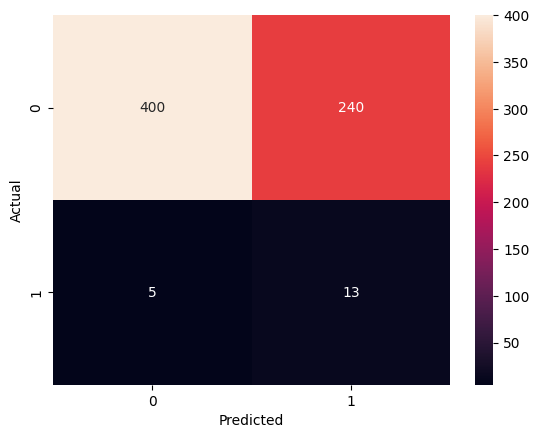

In [ ]:
# Use the model to make predictions on the testing data
y_pred = balanced_model.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

#400 true negatives, 240 false positives, 5 false negatives (missed strokes), 13 true positives (correctly detected strokes)
#63% accuracy

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Repeat Steps 10-14 for Model 2

Logistic Regression Model Summary

In [ ]:
import statsmodels.api as sm

# Separate features and target variable
X = df_clean1.drop('stroke', axis=1)
y = df_clean1['stroke']

# Convert all columns in X to integer type
X = X.astype(int)

# Drop one category from each one-hot encoded group to avoid multicollinearity
X = X.drop(columns=['employment_Unemployed', 'smoking_status_Unknown'])

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

         Current function value: 0.111595
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3288
Model:                          Logit   Df Residuals:                     3277
Method:                           MLE   Df Model:                           10
Date:                Tue, 27 Jan 2026   Pseudo R-squ.:                  0.1183
Time:                        19:07:06   Log-Likelihood:                -366.92
converged:                      False   LL-Null:                       -416.16
Covariance Type:            nonrobust   LLR p-value:                 1.099e-16
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -21.8976   1.06e+04     -0.002      0.998   -2.09e+04    2.09e+04
age        

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
